Hussein Hamie
500876254
AER 850 Machine Learning
Assignment 1

We Begin by importing the initial libraries for plotting and data preprocessing

In [61]:
# Importing of libraries
import numpy as np
import csv
import matplotlib.pyplot as plt

In [24]:
# Function used to import datasets. The function saves X and Y Columns as Numpy arrays and reshapes them in 2D form.

def getdata(filename):
    with open (filename,'r') as csvfile:
        Dataset_1_test = csv.reader(csvfile)
        X = []
        Y = []
        for row in Dataset_1_test:
            x = row[0]
            y = row[1]
            X.append(x)
            Y.append(y)

    X = np.array(X).astype(np.float32)
    Y = np.array(Y).astype(np.float32)
    # convert rank 1 array to rank 2 array
    X = np.reshape(X, (-1, 1))
    Y = np.reshape(Y, (-1, 1))
    return X , Y

In [25]:
#Importing all datasets using get data function and assigning X and Y respectively
X_test, Y_test = getdata("Dataset1/Dataset_1_test.csv")
X_train, Y_train = getdata("Dataset1/Dataset_1_train.csv")
X_valid, Y_valid = getdata("Dataset1/Dataset_1_valid.csv")

Now we plot all three data sets so we can visualize the distribution we are trying to plot

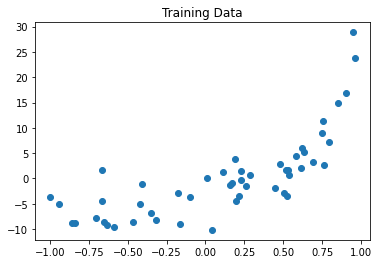

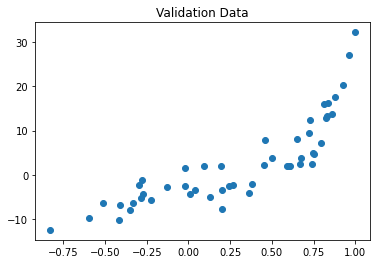

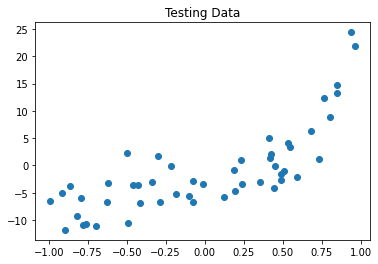

In [26]:
plt.scatter(X_train,Y_train)
plt.title('Training Data')
plt.show()
plt.scatter(X_valid,Y_valid)
plt.title('Validation Data')
plt.show()
plt.scatter(X_test,Y_test)
plt.title('Testing Data')
plt.show()

0.881992551315129


D:\codefiles\lib\site-packages\numpy\polynomial\polynomial.py:1362: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


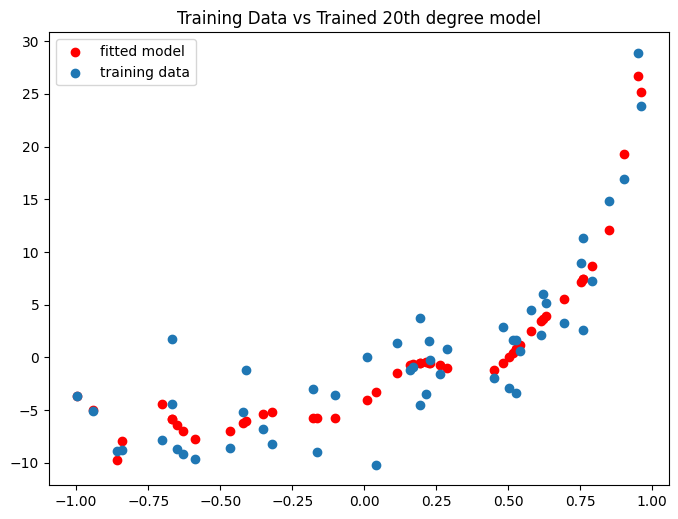

In [45]:
from sklearn.metrics import r2_score

mymodel=np.polynomial.Polynomial.fit(X_train.flatten(),Y_train.flatten(),20)
print(r2_score(Y_train.flatten(), mymodel(X_train.flatten())))


plt.figure(figsize=(8, 6), dpi=100)
plt.scatter(X_train,mymodel(X_train), label='fitted model',color='red')
plt.scatter(X_train,Y_train, label='training data')
plt.title("Training Data vs Trained 20th degree model")
plt.legend()
plt.show()

0.2659439645874667


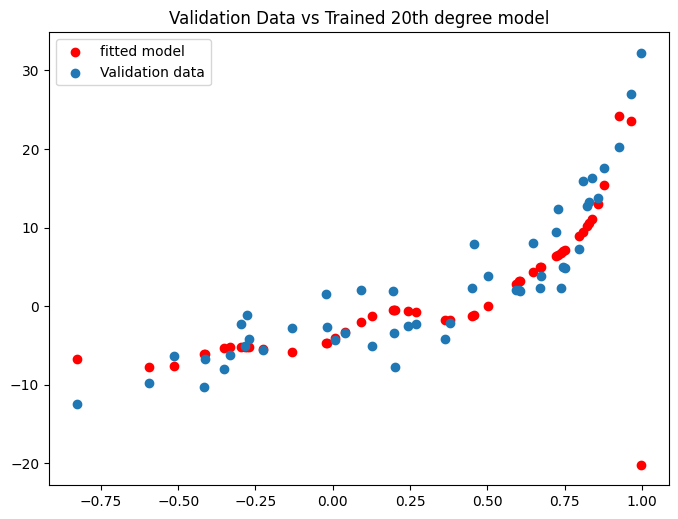

In [47]:
print(r2_score(Y_valid.flatten(), mymodel(X_valid.flatten())))


plt.figure(figsize=(8, 6), dpi=100)
plt.scatter(X_valid,mymodel(X_valid), label='fitted model',color='red')
plt.scatter(X_valid,Y_valid, label='Validation data')
plt.title("Validation Data vs Trained 20th degree model")
plt.legend()
plt.show()

In [49]:
from sklearn.svm import SVR

In [58]:
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=20, epsilon=0.1, coef0=1)

In [ ]:
X = X_train.reshape(-1, 1)
y= Y_train.reshape(-1, 1)

plt.figure(figsize=(8, 6), dpi=100)
plt.scatter(X_valid,mymodel(X_valid), label='fitted model',color='red')
plt.scatter(X_valid,Y_valid, label='Validation data')
plt.title("Validation Data vs Trained 20th degree model")
plt.legend()
plt.show()

D:\codefiles\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\codefiles\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\codefiles\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


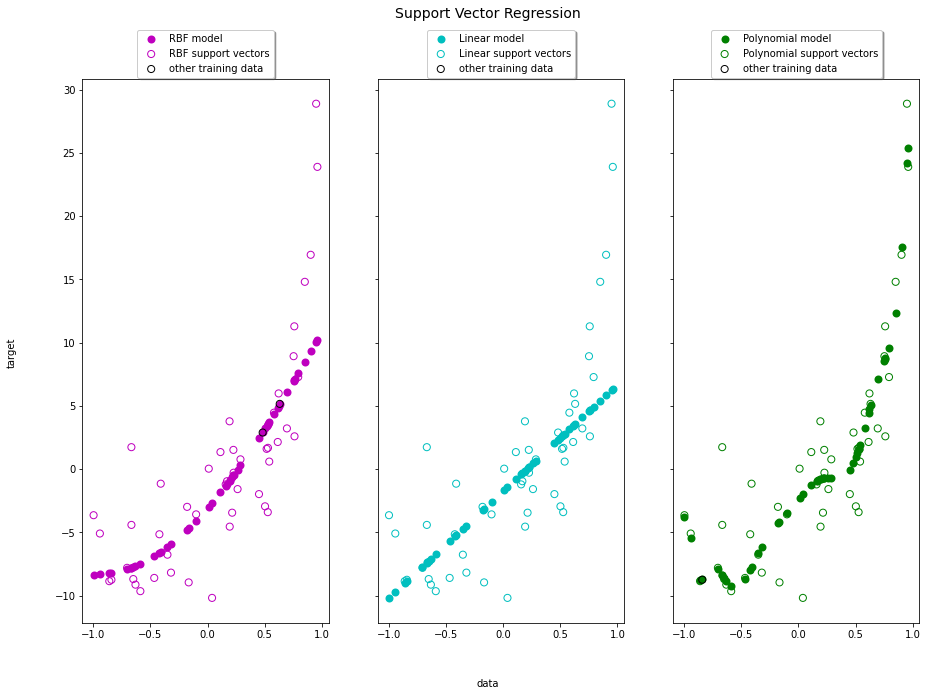

In [60]:
X = X_train.reshape(-1, 1)
y= Y_train.reshape(-1, 1)

lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ["RBF", "Linear", "Polynomial"]
model_color = ["m", "c", "g"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].scatter(
        X,
        svr.fit(X, y).predict(X),
        color=model_color[ix],
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[svr.support_],
        y[svr.support_],
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} support vectors".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[np.setdiff1d(np.arange(len(X)), svr.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr.support_)],
        facecolor="none",
        edgecolor="k",
        s=50,
        label="other training data",
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

PART B:
Adding L1 Regularization